In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
import math
import seaborn as sns
import data_preprocessing as proc
import networkx as nx
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/home/janek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
df, shelves = proc.get_all_data()

/home/janek/Sieciowe/Books-ONOS/data_preprocessing.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_name, error_bad_lines=False, sep=", ", names=columns)
Skipping line 29: Expected 11 fields in line 29, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 58: Expected 11 fields in line 58, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 59: Expected 11 fields in line 59, saw 12. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 60: Expected 11 fields in line 60, saw 13. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 61: Expected 11 fields in li

Skipping line 537: Expected 11 fields in line 537, saw 12. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 538: Expected 11 fields in line 538, saw 12. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 540: Expected 11 fields in line 540, saw 12. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 541: Expected 11 fields in line 541, saw 12. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 542: Expected 11 fields in line 542, saw 12. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 543: Expected 11 fields in line 543, saw 12. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 544: Expected 11 fields in line 544, saw 12. Error could possibly be due to quotes being ignored w

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2669 entries, 0 to 1009
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          2669 non-null   int64  
 1   TITLE       2669 non-null   object 
 2   YEAR        2669 non-null   object 
 3   RATE        2669 non-null   float64
 4   PAGES       2669 non-null   object 
 5   POPULARITY  2669 non-null   int64  
 6   AUTHOR      2669 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 166.8+ KB


In [4]:
df.head()

,ID,TITLE,YEAR,RATE,PAGES,POPULARITY,AUTHOR
0,1000,Millionaire Women Next Door: The Many Journeys of Successful American Businesswomen,2004,3.88,320,631,Thomas J. Stanley
2,1003,The Millionaire Next Door: The Surprising Secrets of America's Wealthy,1998,4.03,258,15,Thomas J. Stanley
3,1004,Think and Grow Rich,2001,4.18,345,36,Napoleon Hill
4,1005,Think and Grow Rich: The Landmark Bestseller Now Revised and Updated for the 21st Century,2005,4.18,320,91373,Napoleon Hill
5,1006,Think and Grow Rich!,2004,4.18,412,330,Napoleon Hill


In [5]:
df.describe(include='all')

,ID,TITLE,YEAR,RATE,PAGES,POPULARITY,AUTHOR
count,2669.000000,2669,2669,2669.000000,2669,2.669000e+03,2669
unique,NaN,2669,72,NaN,553,NaN,1714
top,NaN,Homeric Questions,None,NaN,None,NaN,Stephen King
freq,NaN,1,441,NaN,557,NaN,29
mean,38970.913076,NaN,NaN,3.805388,NaN,7.541488e+03,NaN
std,46237.774434,NaN,NaN,0.685363,NaN,6.233402e+04,NaN
min,1000.000000,NaN,NaN,0.000000,NaN,0.000000e+00,NaN
25%,2174.000000,NaN,NaN,3.660000,NaN,7.000000e+00,NaN
50%,10252.000000,NaN,NaN,3.920000,NaN,4.200000e+01,NaN
75%,100472.000000,NaN,NaN,4.110000,NaN,3.250000e+02,NaN


In [6]:
data_arr = df.values
print(data_arr[1])

[1003
 "The Millionaire Next Door: The Surprising Secrets of America's Wealthy"
 '1998' 4.03 '258' 15 'Thomas J. Stanley']


In [26]:
all_tags = []
for key, value in shelves.items():
    all_tags += value
unique_tags = list(set(all_tags))
print("how many books: " + str(len(shelves.items())))    
print("how many tags with duplicates " + str(len(all_tags)))
print("how many unique tags: " + str(len(unique_tags)))

how many books: 3580
how many tags with duplicates 229359
how many unique tags: 44697


In [27]:
columns = list(zip(*data_arr))
size = df.ISBN.size
matrix = np.zeros((size,size))
authors = columns[-1]
years = columns[4]
pages= columns[6]
rate = columns[5]
popularity= columns[7]


AttributeError: 'DataFrame' object has no attribute 'ISBN'

<Figure size 1440x864 with 0 Axes>

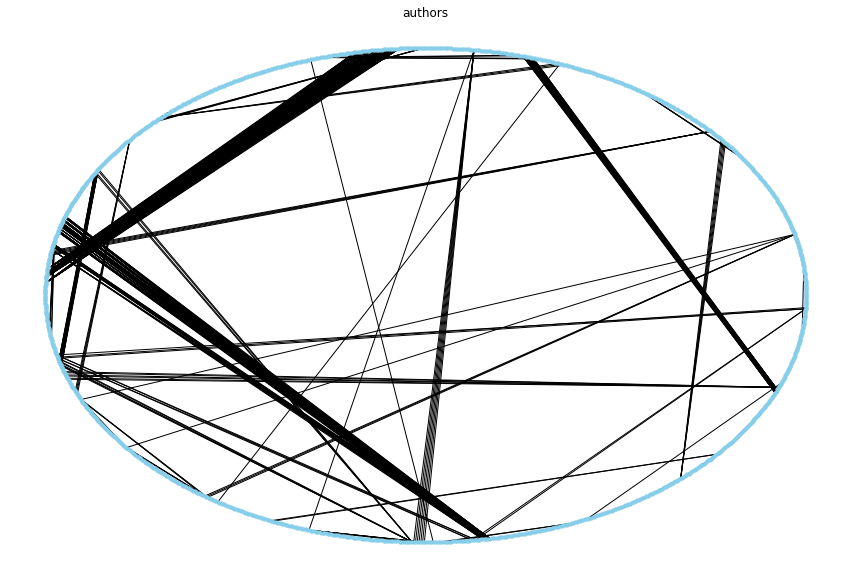

<Figure size 1440x864 with 0 Axes>

In [65]:
for i in range(size):
    for j in range(size):
        if authors[i] == authors[j]:
            matrix[i][j] = 1
            matrix[j][i] = 1
G=nx.from_numpy_matrix(matrix)
f, ax = plt.subplots(1, 1, figsize = (15, 10))
nx.draw(G, with_labels=False, node_size=10,font_size=0.001, node_color="skyblue", pos=nx.circular_layout(G,scale=0.1), ax=ax)
plt.title("authors")
plt.figure(20,figsize=(20,12)) 



Text(0.5, 1.0, 'years')

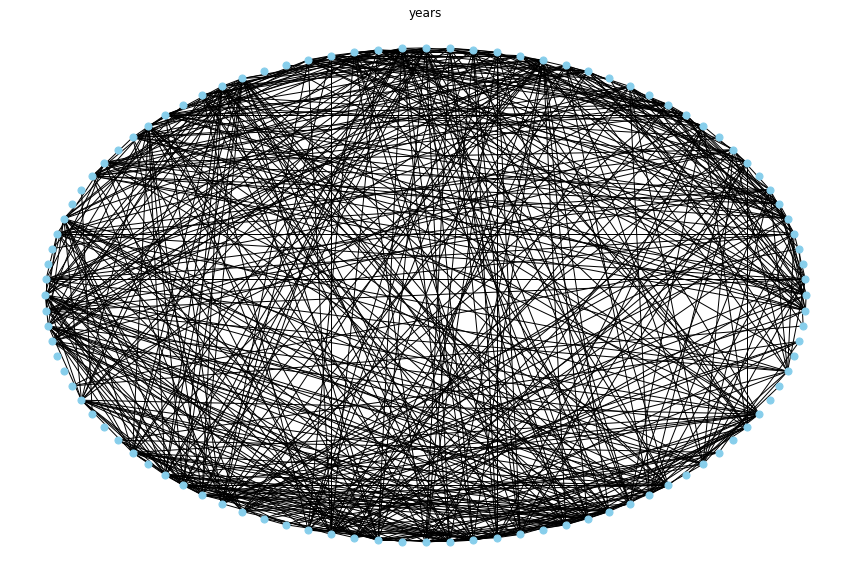

In [75]:
size = 100
matrix = np.zeros((size,size))
for i in range(size):
    for j in range(size):
        if years[i] == years[j]:
            matrix[i][j] = 1
            matrix[j][i] = 1
G=nx.from_numpy_matrix(matrix)
f, ax = plt.subplots(1, 1, figsize = (15, 10))
nx.draw(G, with_labels=False, node_size=50,font_size=0.001, node_color="skyblue", pos=nx.circular_layout(G,scale=0.001), ax=ax)
plt.title("years")



Text(0.5, 1.0, 'pages')

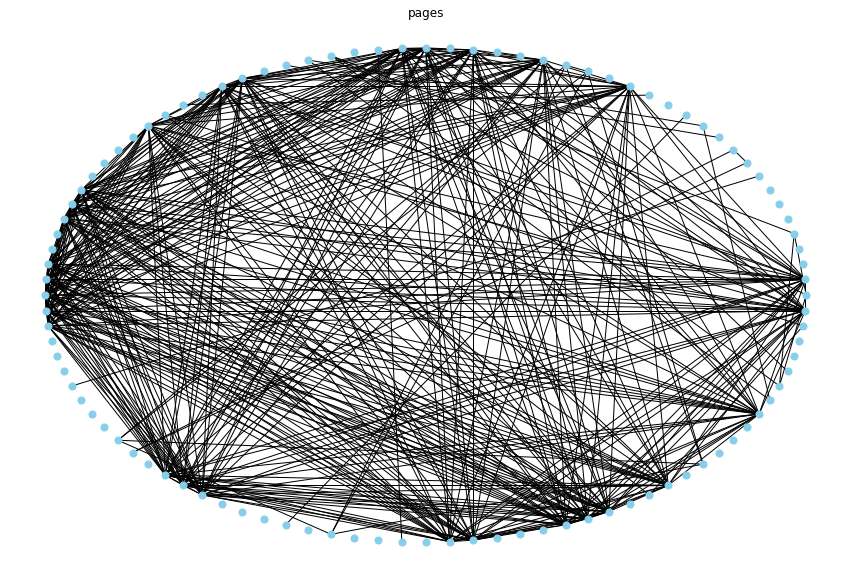

In [92]:
size = 100
matrix = np.zeros((size,size))
for i in range(size):
    for j in range(size):
        if pages[i] == pages[j]:
            matrix[i][j] = 1
            matrix[j][i] = 1
G=nx.from_numpy_matrix(matrix)
f, ax = plt.subplots(1, 1, figsize = (15, 10))
nx.draw(G, with_labels=False, node_size=50,font_size=0.001, node_color="skyblue", pos=nx.circular_layout(G,scale=0.001), ax=ax)
plt.title("pages")


In [107]:
from sklearn.preprocessing import KBinsDiscretizer  
#np.digitize(rate,[1.5,2.5,3.5,4.5])
#print(list(popularity))
#KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform').fit_transform(list(popularity))